# Guided Project: Star Wars Survey
The goal of this project is to analyze data collected by FiveThirtyEight answering some questions about Star Wars fans. 

The FiveThirtyEight team collected the data by surveying Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb).

The data can be found in the star_wars.cv. The data has several columns, including:
* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

### Import libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data
The data can be found in the [GiutHub Repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [75]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

We take a look at the data inside the file and the columns.

In [76]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [77]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

Remove null values and duplicates

In [78]:
tokeep = star_wars['RespondentID'].notnull()
star_wars = star_wars[tokeep]
star_wars = star_wars.drop_duplicates(subset='RespondentID')
star_wars['RespondentID'].isnull().sum()

0

## Data clean-up
* Transform YES NO questionst to boolean

In [79]:
icols = [1,2]
dic = {'Yes': True, 'No': False}
for icol in icols:
    star_wars.iloc[:,icol] = star_wars.iloc[:,icol].map(dic)

In [80]:
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We see that a considerable percentage of people do not answer whether they are or not Star Wars fans.

Now we proceed to transform the checkbox questions to Boolean True/False. Currently if the person saw the movie, the movie name is the answer, otherwise NaN. The columns are also not intuitive, we will change them to a name easier to follow as seen_1, seen_2, .., seen_n.

In [82]:
# Rename columns
oldcols = star_wars.columns[3:9]
newcols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
dic = {oldcols[i]:newcols[i] for i in range(len(newcols))}
star_wars = star_wars.rename(columns=dic)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [86]:
# We match answers which start with 'Star Wars'
# as True (watched) all others as False
for col in newcols:
    star_wars[col] = star_wars[col].str.contains('Star Wars').fillna(False)

In [87]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Rename the columns addressing the ranking of Star Wars movies, and convert the tyoe of the ranking (1 to 6) to float

In [92]:
# change columnn names
oldcols = star_wars.columns[9:15]
newcols = ['ranking_'+str(i) for i in range(1,7)]
dic = {oldcols[i]:newcols[i] for i in range(len(newcols))}
star_wars = star_wars.rename(columns=dic)
# convert type of ranking columns to float
star_wars[newcols] = star_wars[newcols].astype('float')

In [93]:
star_wars[newcols].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Analyze the results
Find out which is the most popular movie

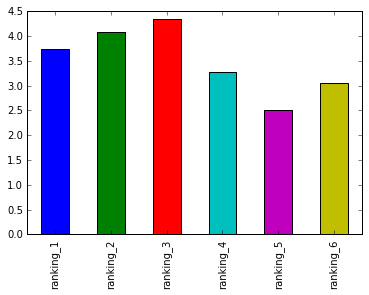

In [109]:
rank_cols = star_wars.columns[9:15]
star_wars[rank_cols].mean().plot(kind='bar')

We see is that the most popular movies are the old ones, and amomg them the highest rated is Star Wars: The empire strikes back.

Now we figure out which are the most seen movies

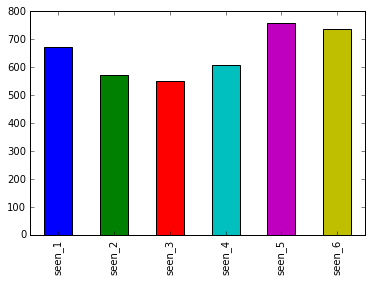

In [102]:
seen_cols = star_wars.columns[3:9]
star_wars[seen_cols].sum().plot(kind='bar')

This is more tied, and we see that from the old ones, the V and VI are the most seen, whereas from the new ones it is the I. This could be due to viewers being turn down after the first new movie and deciding to not see the episodes II and III. Is not clear why the Episonde IV has been viewed less than the other two old episodes.

### Analysis in subgroups
We perform the prvious analysis but now doing segmentation in the following subgroups:
* Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
* Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
* Gender - Male or Female


In [103]:
group_cols = ['Do you consider yourself to be a fan of the Star Wars film franchise?',
              'Do you consider yourself to be a fan of the Star Trek franchise?', 
              'Gender']

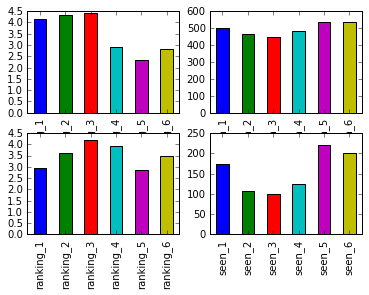

In [118]:
sw_fans = star_wars[star_wars[group_cols[0]]==True]
sw_no_fans = star_wars[star_wars[group_cols[0]]!=True]
fig, axes = plt.subplots(2,2)
axs = axes.flatten()
sw_fans[rank_cols].mean().plot(kind='bar',ax=axs[0])
sw_fans[seen_cols].sum().plot(kind='bar', ax=axs[1])
sw_no_fans[rank_cols].mean().plot(kind='bar',ax=axs[2])
sw_no_fans[seen_cols].sum().plot(kind='bar', ax=axs[3])

We can clearly see that fans liked the most the older movies, whereas no fans enjoyed almost equally episode I and V, followed by VI and II. On the other hand, fans seemed to have spent time and energy watching all the movies, whereas no fans watched the most episodes V and VI as well as I.

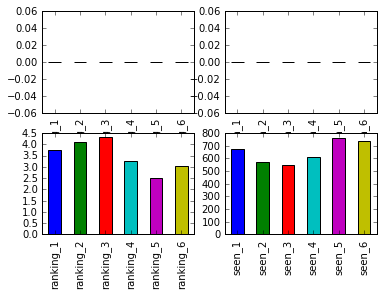

In [119]:
st_fans = star_wars[star_wars[group_cols[1]]==True]
st_no_fans = star_wars[star_wars[group_cols[1]]!=True]
fig, axes = plt.subplots(2,2)
axs = axes.flatten()
st_fans[rank_cols].mean().plot(kind='bar',ax=axs[0])
st_fans[seen_cols].sum().plot(kind='bar', ax=axs[1])
st_no_fans[rank_cols].mean().plot(kind='bar',ax=axs[2])
st_no_fans[seen_cols].sum().plot(kind='bar', ax=axs[3])

Surprisingly there were no Star Trek Fans in the survey

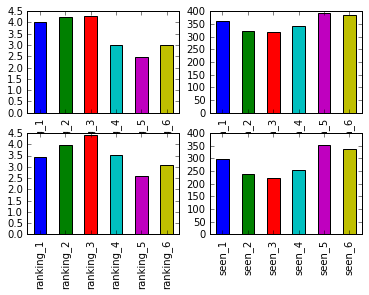

In [121]:
male = star_wars[star_wars[group_cols[2]]=='Male']
female = star_wars[star_wars[group_cols[2]]=='Female']
fig, axes = plt.subplots(2,2)
axs = axes.flatten()
male[rank_cols].mean().plot(kind='bar',ax=axs[0])
male[seen_cols].sum().plot(kind='bar', ax=axs[1])
female[rank_cols].mean().plot(kind='bar',ax=axs[2])
female[seen_cols].sum().plot(kind='bar', ax=axs[3])

Female seemed to like the more the newer movies than their male counterparts.

## Conclusion
From this project we learnt the following:
* The most popular movies are the old ones, and amomg them the highest rated is Star Wars: The empire strikes back.
* The episodes V and VI are the most seen movies, whereas from the new ones it is the I. This could be due to viewers being turn down after the first new movie and deciding to not see the episodes II and III.
* SW fans liked the most the older movies, whereas no fans enjoyed almost equally newer and older episodes. Many no fans decided to not see the episodes II and III, perhaps because they were turned down after episode I.
* Men seem to like in general more the older episodes than the newer ones. This could be due to strong correlation between gender and SW fandom.